##                                                   AI Image Classifier

#### Task: 
To construct a CNN model which when provided with an image is able to detect if it is an AI generated image or a real image.

### Dataset: 
The dataset was prepared by scrapping images from the web using Selenium. Two sets of AI images and Real Images were scrapped and divided into two folders of train and test, further consisting of FAKE and REAL folders, with respective kinds of data.

### Importing Libraries and Unzipping File for Data

In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import time
from tempfile import TemporaryDirectory

In [2]:
import matplotlib.pyplot as plt

In [66]:
!pip install tensorflow

In [67]:
!pip install torch

In [3]:
import tensorflow
import torch
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
cwd = os.getcwd()
print(cwd)

C:\Users\dell\Project_ImageClassifier


In [5]:
zip_file_path  = 'Images1.zip'

In [6]:
train_images, train_labels = [], []
test_images, test_labels = [], [] 

In [7]:
import zipfile

In [8]:
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))

In [9]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        file_path = file_info.filename

        if not is_image_file(file_path):
            continue
        
        if 'train' in file_path:
            folder = 'train'
        elif 'test' in file_path:
            folder = 'test'

            
        if 'REAL' in file_path:
            label = 0
        elif 'FAKE' in file_path:
            label = 1
            
        with zip_ref.open(file_path) as file:
            image = Image.open(file)
            image = image.convert('RGB')
        
        # Append the image and label to the respective lists
        if folder == 'train':
            train_images.append(image)
            train_labels.append(label)
        elif folder == 'test':
            test_images.append(image)
            test_labels.append(label)

In [10]:
print("Training Images = ", len(train_images))
print("Testing Images = ", len(test_images))

Training Images =  5451
Testing Images =  519


In [11]:
print(len(train_labels))
print(len(test_labels))

5451
519


### Preparing Data

In [12]:
image_size = (150, 150)
batch_size = 50

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

In [14]:
X_train = []

In [15]:
X_train = []

In [16]:
for i in range(int(len(train_images))):
    X_train.append(img_to_array(train_images[i].resize(image_size)))

In [17]:
len(X_train)

5451

In [18]:
X_train = np.array(X_train)

In [19]:
X_test = []

In [20]:
i = 0;
for i in range(int(len(test_images))):
    X_test.append(img_to_array(test_images[i].resize(image_size)))

In [21]:
X_test = np.array(X_test)

In [22]:
print("Total training images = ", len(X_train))
print("Total testing images = ", len(X_test))

Total training images =  5451
Total testing images =  519


We have 5451 images to train the model and 519 images to test the model

In [23]:
#creating the y_train and y_test data 

In [24]:
y_train = []
y_test = []

In [25]:
for i in range(int(len(train_labels))):
    y_train.append(train_labels[i])

In [26]:
for i in range(int(len(test_labels))):
    y_test.append(test_labels[i])

In [27]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [28]:
print(len(y_train))
print(len(y_test))

5451
519


In [29]:
#normalise

In [30]:
X_train = X_train/255.0
X_test = X_test/255.0

In [31]:
print("size of y_train = ", len(y_train))
print("size of y_test = ", len(y_test))

size of y_train =  5451
size of y_test =  519


### CNN Model

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\dell\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 147, 147, 16)   │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,353 (579.50 KB)

 Trainable params: 148,353 (579.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
epochs = 25
batch_size = 50

In [39]:
logdir = 'logs'

In [40]:
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir = logdir)

### Model Training 

In [41]:
history = model.fit(X_train, y_train, epochs = epochs,batch_size = batch_size, callbacks=[tensorboard_callback])

Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 179s 192ms/step - accuracy: 0.5464 - loss: 0.6880
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - accuracy: 0.6426 - loss: 0.6253
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.7001 - loss: 0.5711
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.6977 - loss: 0.5716
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.7420 - loss: 0.5124
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 195ms/step - accuracy: 0.7803 - loss: 0.4697
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.8002 - loss: 0.4397
Epoch 8/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.7907 - loss: 0.4370
Epoch 9/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.8326 - loss: 0.3736
Epoch 10/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.8440 - loss: 0.3543
Epoch 11/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.8620 - loss: 0.3200
Epoch 12/25
110/11

### Model Testing

In [42]:
loss, accuracy  = model.evaluate(X_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8050 - loss: 0.7789


In [43]:
print("accuracy on test data = ", accuracy*100, "%")

accuracy on test data =  77.07129120826721 %


In [44]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

171/171 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9915 - loss: 0.0271


In [45]:
print("accuracy on training data = ", train_accuracy*100, "%")

accuracy on training data =  99.19281005859375 %


### Plotting Accuracy and Loss

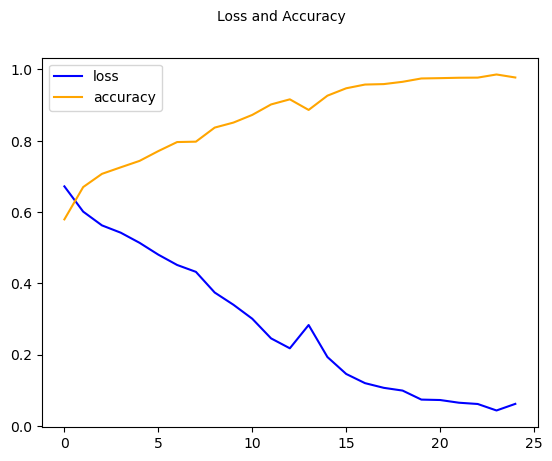

In [46]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Loss and Accuracy', fontsize=10)
plt.legend(loc="upper left")
plt.show()

In [47]:
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix, accuracy_score

In [48]:
y_result = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [49]:
for i in range(len(y_result)):
    if(y_result[i] > 0.5):
        y_result[i] = 1
    else:
        y_result[i] = 0

In [50]:
print("Accuracy Score : ", accuracy_score(y_result, y_test))
print("F1 score : ", f1_score(y_result, y_test))
print("ROC AUC Score : ", roc_auc_score(y_result, y_test))

Accuracy Score :  0.7707129094412332
F1 score :  0.7715930902111325
ROC AUC Score :  0.771414342629482


In [51]:
print("Confusion Matrix : ", confusion_matrix(y_test, y_result))

Confusion Matrix :  [[199  67]
 [ 52 201]]


### Saving the model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('model','ai_imageclassifier.h5'))

In [54]:
model = load_model(os.path.join('model','ai_imageclassifier.h5'))